In [69]:
# Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Reading the dataset
df= pd.read_csv("/content/olympics-economics.csv")
# retrieving the top 5 rows
df.head(5)

,country,country_code,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,40,44,42,126,81695.19,2023,334.9
1,China,CHN,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,18,19,16,53,64711.77,2023,26.6
4,France,FRA,16,26,22,64,44460.82,2023,68.2


In [71]:
df.shape

(90, 9)

In [72]:
# printing number of unique countries.
num_countries = df["country"].nunique()
print(num_countries)


90


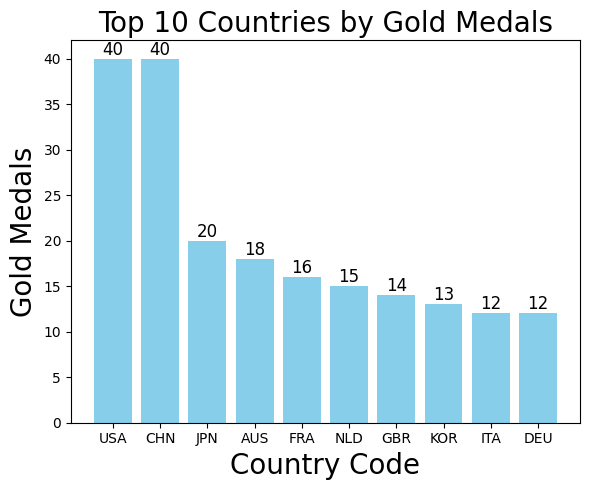

In [73]:
def plot_top_countries_by_gold(df):
    """
    Plots the bar plot of the top 10 countries who got more medals.

    Parameters:
    df (DataFrame): The input DataFrame containing country data, including 'country_code' and 'gold'.
    """
    # retrieving the top 10 countries in descending order.
    top_countries = df.sort_values(by="gold", ascending=False).head(10)

    # Constructing a bar plot with skyblue bars.
    plt.figure(figsize=(6, 5))
    bars = plt.bar(top_countries["country_code"], top_countries["gold"], color='skyblue')

    # Plotting x and y labels with title and fontsize.
    plt.xlabel("Country Code", fontsize=20)
    plt.ylabel("Gold Medals", fontsize=20)
    plt.title("Top 10 Countries by Gold Medals", fontsize=20)
    plt.tight_layout()

    # Annotate totals on top of each bar.
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=12)

    # Show plot
    plt.show()

# Calling the function.
plot_top_countries_by_gold(df)


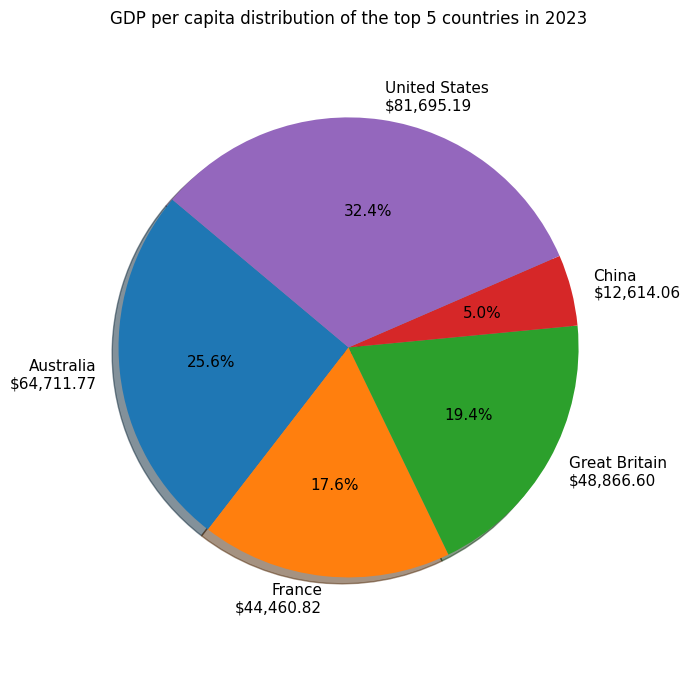

In [74]:
def plot_gdp_distribution_last_countries(df):
    """
    Plotting the piechart for GDP per capita distribution for the top 5 countries based on total medals.

    Parameters:
    df (DataFrame): The input DataFrame containing country data, including 'country', 'total', 'gdp', and 'gdp_year'.
    """
    # getting the data of top 5 countries by performing descending order.
    top_5_countries = df.sort_values(by='total').tail(5)

    # get the top 5 countries of gdp with respcetive year 2023.
    countries = top_5_countries['country']
    gdp = top_5_countries['gdp']
    gdp_year = top_5_countries['gdp_year'].iloc[0]  #

    # Create custom labels with country names and GDP values
    labels = [f"{country}\n${gdp_value:,.2f}" for country, gdp_value in zip(countries, gdp)]

    # Create the pie chart with the characterstic features.
    plt.figure(figsize=(7, 7))
    plt.pie(gdp, labels=labels, autopct='%1.1f%%', startangle=140, shadow=True, textprops={'fontsize': 11})
    plt.title(f"GDP per capita distribution of the top 5 countries in {gdp_year}")
    # equal ratio.
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


plot_gdp_distribution_last_countries(df)


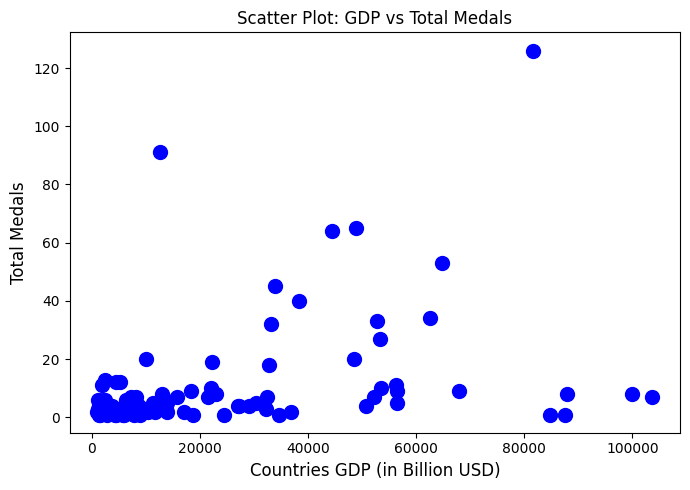

In [75]:
def plot_gdp_vs_total_medals(df):
    """
    Creates a scatter plot of GDP versus total medals.

    Parameters:
    df (DataFrame): The input DataFrame containing 'gdp' and 'total' columns.
    """
    # Creating the scatter plot
    plt.figure(figsize=(7, 5))
    plt.scatter(df['gdp'], df['total'], color='blue', s=100)

    # Set the labels and title
    plt.title('Scatter Plot: GDP vs Total Medals', fontsize=12)
    plt.xlabel('Countries GDP (in Billion USD)', fontsize=12)
    plt.ylabel('Total Medals', fontsize=12)

    # Optional grid
    # plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Invoking the function
plot_gdp_vs_total_medals(df)

In [76]:
# Get descriptive statistics for numerical columns and round the values
describe_table = df.describe()
describe_table


,gold,silver,bronze,total,gdp,gdp_year,population
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.644444,3.633333,4.255556,11.533333,24478.053556,2022.977778,69.027778
std,7.018933,6.797967,6.586607,19.782071,25547.857382,0.148231,213.286437
min,0.000000,0.000000,0.000000,1.000000,1014.210000,2022.000000,0.100000
25%,0.000000,0.000000,1.000000,2.000000,5815.180000,2023.000000,5.325000
50%,1.000000,1.000000,2.000000,5.000000,13061.185000,2023.000000,12.150000
75%,3.000000,3.000000,5.000000,9.000000,34484.677500,2023.000000,48.550000
max,40.000000,44.000000,42.000000,126.000000,103684.880000,2023.000000,1428.600000


In [77]:
# Calculating the correlation matrix for the dataframe confusion_matrix_1
confusion_matrix_1 = df.corr(numeric_only=True)
print(confusion_matrix_1)



                gold    silver    bronze     total       gdp  gdp_year  \
gold        1.000000  0.910676  0.880333  0.960874  0.331392  0.057117   
silver      0.910676  1.000000  0.939877  0.979703  0.305993  0.069876   
bronze      0.880333  0.939877  1.000000  0.968294  0.376044  0.017390   
total       0.960874  0.979703  0.968294  1.000000  0.347942  0.050068   
gdp         0.331392  0.305993  0.376044  0.347942  1.000000 -0.281923   
gdp_year    0.057117  0.069876  0.017390  0.050068 -0.281923  1.000000   
population  0.445283  0.347893  0.347596  0.393278 -0.112182  0.044124   

            population  
gold          0.445283  
silver        0.347893  
bronze        0.347596  
total         0.393278  
gdp          -0.112182  
gdp_year      0.044124  
population    1.000000  


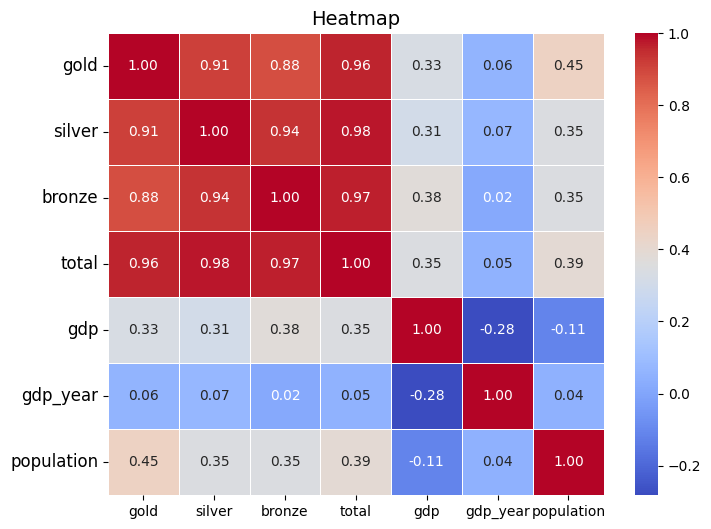

In [78]:
def plot_heatmap(confusion_matrix_1):
    """
    Plotting a heatmap of the correlation matrix.

    Parameters:
        correlation_matrix (DataFrame): Correlation matrix data.
        title (str, optional): Title of the plot. Defaults to 'Heatmap of Correlation matrix'.
    """
    plt.figure(figsize=(8, 6))
    # plot the correlation matrtix
    sns.heatmap(confusion_matrix_1, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', linecolor='white')
    plt.title("Heatmap", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)
    plt.show()
plot_heatmap(confusion_matrix_1)

In [79]:
def mean_for_columns():

  """
    Calculating mean of the columns, using loop.
    Mean(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    mean_value = df[i].mean()
    print("Mean of", i, ":", mean_value)

all_columns = ['gold',	'silver',	'bronze',	'total',	'gdp',	'population']
mean_for_columns()


Mean of gold : 3.6444444444444444
Mean of silver : 3.6333333333333333
Mean of bronze : 4.2555555555555555
Mean of total : 11.533333333333333
Mean of gdp : 24478.053555555558
Mean of population : 69.02777777777777


In [80]:
def median_for_columns():

  """
    Calculating median of the columns, using loop.
    median(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    median_value = df[i].median()
    print("median of", i, ":", median_value)
all_columns = ['gold',	'silver',	'bronze',	'total',	'gdp',	'population']
median_for_columns()

median of gold : 1.0
median of silver : 1.0
median of bronze : 2.0
median of total : 5.0
median of gdp : 13061.185000000001
median of population : 12.15


In [81]:
def standard_deviation_for_columns():

  """
    Calculating standard deviation of the columns, using loop.
    standard_deviation(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    standard_deviation_value = df[i].std()
    print("Standard Deviation of", i, ":", standard_deviation_value)

all_columns = ['gold',	'silver',	'bronze',	'total',	'gdp',	'population']
standard_deviation_for_columns()


Standard Deviation of gold : 7.0189328410532665
Standard Deviation of silver : 6.797967310201031
Standard Deviation of bronze : 6.586607302345108
Standard Deviation of total : 19.782071101850082
Standard Deviation of gdp : 25547.857382488182
Standard Deviation of population : 213.28643715882436


In [82]:
def skewness_for_columns():

  """
    Calculating skewness of the columns, using loop.
    skew(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    skewness_value = df[i].skew()
    print("skewness of", i, ":", skewness_value)

all_columns = ['gold',	'silver',	'bronze',	'total',	'gdp',	'population']
skewness_for_columns()

skewness of gold : 3.6091613077874567
skewness of silver : 3.6751582885159
skewness of bronze : 3.422723070539075
skewness of total : 3.604264346863323
skewness of gdp : 1.3586363009820437
skewness of population : 5.864695091643461


In [83]:
def kurtosis_for_columns():

  """
    Calculating kurtosis of the columns, using loop.
    kurtosis(): pre-defined module, imported from Statistics library.

  """
  for i in all_columns:
    kurtosis_value = df[i].kurtosis()
    print("kurtosis of", i, ":", kurtosis_value)

all_columns = ['gold',	'silver',	'bronze',	'total',	'gdp',	'population']
kurtosis_for_columns()

kurtosis of gold : 15.14847015804518
kurtosis of silver : 16.034855443256234
kurtosis of bronze : 14.20006527751737
kurtosis of total : 15.203013688853845
kurtosis of gdp : 1.1208358376133303
kurtosis of population : 35.614002471927115
